In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from matplotlib.colors import ListedColormap  

import seaborn as sns

In [2]:
# Importing data and creating a dataframe.
df = pd.read_csv("user-data.csv")
display(df.head())
display(df.dtypes)

,user_id,gender,age,estimated_salary,purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


user_id              int64
gender              object
age                  int64
estimated_salary     int64
purchased            int64
dtype: object

In [3]:
# Extracting independent and dependent variables.
x = df.iloc[:, [2, 3]].values
y = df.iloc[:, 4].values

# Output first five values in both the lists.
print(x[:5])
print(y[:5])

# Independent variables are age and estimated_salary.
# Dependent variable is purchased because it depends on a person's age as well as his/her estimated salary.

[[   19 19000]
 [   35 20000]
 [   26 43000]
 [   27 57000]
 [   19 76000]]
[0 0 0 0 0]


In [4]:
# Splitting the data into training and testing data.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

In [5]:
std_x = StandardScaler()
x_train = std_x.fit_transform(x_train)
x_test = std_x.transform(x_test)

print("x_train:", x_train[:5], "...")
print("")
print("x_test:", x_test[:5], "...")

x_train: [[ 0.58164944 -0.88670699]
 [-0.60673761  1.46173768]
 [-0.01254409 -0.5677824 ]
 [-0.60673761  1.89663484]
 [ 1.37390747 -1.40858358]] ...

x_test: [[-0.80480212  0.50496393]
 [-0.01254409 -0.5677824 ]
 [-0.30964085  0.1570462 ]
 [-0.80480212  0.27301877]
 [-0.30964085 -0.5677824 ]] ...


In [6]:
model = SVC(kernel="linear", random_state=0)
model.fit(x_train, y_train)

SVC(kernel='linear', random_state=0)

In [7]:
# Predicting the testing dataset results
y_pred = model.predict(x_test)
print(y_pred[:10], "...")

[0 0 0 0 0 0 0 1 0 0] ...


In [8]:
df = pd.DataFrame(y_test, y_pred)
df.head()

,0
0,0
0,0
0,0
0,0
0,0


In [9]:
#Creating the Confusion matrix and heatmap
from sklearn.metrics import confusion_matrix  
cm = confusion_matrix(y_test, y_pred)
print(cm)

sns.heatmap(cm, annot=True, cmap="Blues")

[[66  2]
 [ 8 24]]


<Axes: >

In [11]:
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

Accuracy: 0.9


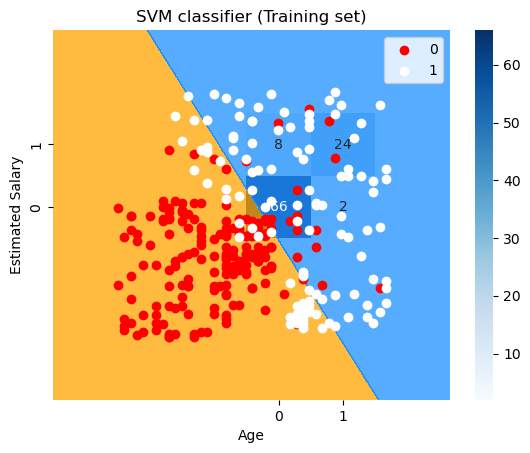

In [12]:
x_set, y_set = x_train, y_train

x1, x2 = np.meshgrid(np.arange(start=x_set[:, 0].min() - 1, stop=x_set[:, 0].max() + 1, step=0.01), np.arange(start=x_set[:, 1].min() - 1, stop=x_set[:, 1].max() + 1, step=0.01)) 

plt.contourf(x1, x2, model.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape), alpha = 0.75, cmap = ListedColormap(('orange', 'dodgerblue')))  
plt.xlim(x1.min(), x1.max())  
plt.ylim(x2.min(), x2.max())  

for i, j in enumerate(np.unique(y_set)):  
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1], c = [ListedColormap(('red', 'white'))(i)], label = j)  

plt.title('SVM classifier (Training set)')  

plt.xlabel('Age')  
plt.ylabel('Estimated Salary')  

plt.legend()

plt.show()  

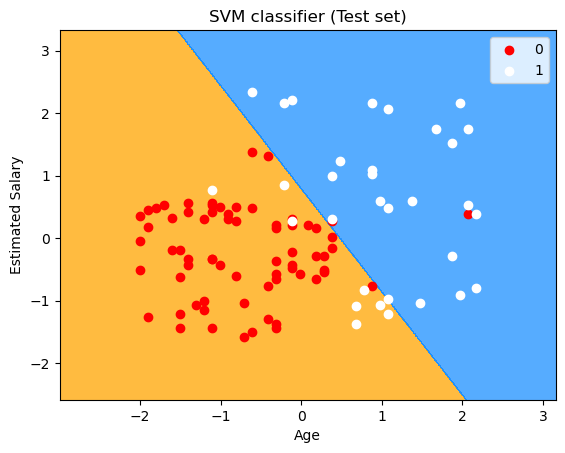

In [13]:
#Visulaizing the test set result  
x_set, y_set = x_test, y_test  
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step  =0.01), np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))  

plt.contourf(x1, x2, model.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape), alpha = 0.75, cmap = ListedColormap(('orange','dodgerblue' )))  
plt.xlim(x1.min(), x1.max())  
plt.ylim(x2.min(), x2.max())  

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1], c=[ListedColormap(('red', 'white'))(i)], label=j)

plt.title('SVM classifier (Test set)')  
plt.xlabel('Age')  
plt.ylabel('Estimated Salary')  
plt.legend()  
plt.show()  